# 机器学习算法（一）: 基于逻辑回归的分类预测

本学习笔记为阿里云天池龙珠计划机器学习训练营的学习内容，学习链接为：https://tianchi.aliyun.com/specials/promotion/aicampml

## 一、学习知识点概要

1、学习逻辑回归（LogisticRegression，LR）的理论

2、掌握 LR 的 sklearn 函数调用使用，并将其运用到鸢尾花iris数据集（sklearn 中自带）预测

## 二、学习内容

###  1 LR 理论基础

参考：
1. 《统计学习方法》，清华大学出版社，李航著，2019年出版
2. 《机器学习》，清华大学出版社，周志华著，2016年出版
3.  https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
4.  https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/

算法实现的功能：Logistic regression is one of the most popular machine learning algorithms for binary classification.（多分类问题也可以转化成二分类问题解决）

#### Logistic Function

Before we dive into logistic regression, let’s take a look at the logistic function, the heart of the logistic regression technique.

The logistic function is defined as:

transformed = 1 / (1 + e^-x)

Where e is the numerical constant Euler’s number and x is a input we plug into the function.

Let’s plug in a series of numbers from -5 to +5 and see how the logistic function transforms 

#### Logistic Regression Model

The logistic regression model takes real-valued inputs and makes a prediction as to the probability of the input belonging to the default class (class 0).

If the probability is > 0.5 we can take the output as a prediction for the default class (class 0), otherwise the prediction is for the other class (class 1).

For this dataset, the logistic regression has three coefficients just like linear regression, for example:

output = b0 + b1*x1 + b2*x2

The job of the learning algorithm will be to discover the best values for the coefficients (b0, b1 and b2) based on the training data.

Unlike linear regression, the output is transformed into a probability using the logistic function:

p(class=0) = 1 / (1 + e^(-output))

In your spreadsheet this would be written as:

p(class=0) = 1 / (1 + EXP(-output))

### 2 算法实战
### 2.1 Demo实践

#### step 1 库函数导入

In [2]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

#### Step2:模型训练

In [3]:
## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用逻辑回归模型
lr_clf = LogisticRegression()

## 用逻辑回归模型拟合构造的数据集
lr_clf = lr_clf.fit(x_fearures, y_label) #其拟合方程为 y=w0+w1*x1+w2*x2

#### Step3:模型参数查看

In [4]:
## 查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)

## 查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)

the weight of Logistic Regression: [[0.73462087 0.6947908 ]]
the intercept(w0) of Logistic Regression: [-0.03643213]


#### Step4:数据和模型可视化

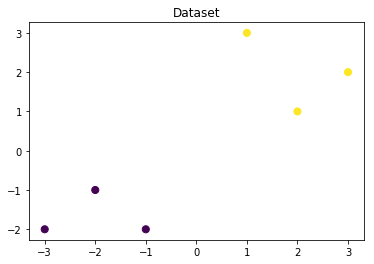

In [11]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
x_min, x_max = plt.xlim()   # 为下步构造决策边界准备
y_min, y_max = plt.ylim()
plt.show()

可视化决策边界

In [12]:
nx, ny = 200, 100
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))  # can see help(np.meshgrid)

In [34]:
## Returns the probability of the sample for each class in the model
z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])

In [36]:
z_proba

array([[0.98279027, 0.01720973],
       [0.98237181, 0.01762819],
       [0.98194337, 0.01805663],
       ...,
       [0.00977652, 0.99022348],
       [0.00954264, 0.99045736],
       [0.00931429, 0.99068571]])

In [37]:
z_proba = z_proba[:, 1].reshape(x_grid.shape)

In [38]:
z_proba 

array([[0.01720973, 0.01762819, 0.01805663, ..., 0.68389801, 0.68915974,
        0.69437303],
       [0.01787931, 0.01831374, 0.01875853, ..., 0.69223616, 0.6974205 ,
        0.70255504],
       [0.01857444, 0.01902544, 0.01948717, ..., 0.7004507 , 0.70555553,
        0.7106093 ],
       ...,
       [0.43133203, 0.43733905, 0.44336449, ..., 0.98944188, 0.98969427,
        0.98994069],
       [0.44088576, 0.44692126, 0.45297244, ..., 0.98984012, 0.99008308,
        0.99032029],
       [0.45048347, 0.45654307, 0.46261556, ..., 0.99022348, 0.99045736,
        0.99068571]])

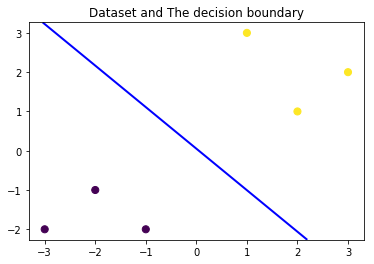

In [44]:
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset and The decision boundary')
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')
# plt.contour参数：contour([X, Y,] Z, [levels], **kwargs)
# [X, Y] 是坐标点，Z 是每个点对应的高度，levels=0.5 的意思是我们要在 z=0.5 的地方画一条等高线。
# 关于等高线可以参考https://blog.csdn.net/xuyangcao123/article/details/107134932/
plt.show()
# 决策边界如下

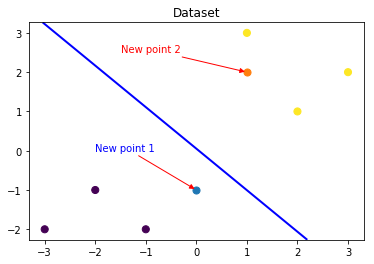

In [45]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

#### Step5:模型预测

In [46]:
## 在训练集和测试集上分别利用训练好的模型进行预测
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所以我们可以利用 predict_proba 函数预测其概率
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.67507358 0.32492642]]
The New point 2 predict Probability of each class:
 [[0.11029117 0.88970883]]


可以发现训练好的回归模型将X_new1预测为了类别0（判别面左下侧），X_new2预测为了类别1（判别面右上侧）。其训练得到的逻辑回归模型的概率为0.5的判别面为上图中蓝色的线。

### 2.2 基于鸢尾花（iris）数据集的逻辑回归分类实践

#### step 1 库函数导入

In [2]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

#### Step2:数据读取/载入

In [3]:
## 我们利用 sklearn 中自带的 iris 数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #数据特征
iris_target = data.target #数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names)

#### Step3:数据信息简单查看

In [4]:
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
## 利用.info()查看数据的整体信息
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
## 其对应的类别标签为，其中0，1，2分别代表'setosa', 'versicolor', 'virginica'三种不同花的类别。
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
## 利用value_counts函数查看每个类别数量
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [8]:
## 对于特征进行一些统计描述
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Step4:可视化描述

In [9]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

In [10]:
iris_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


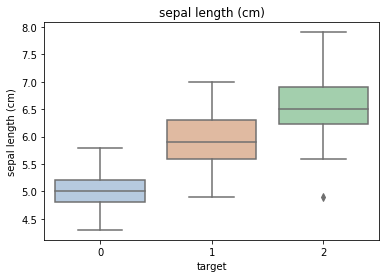

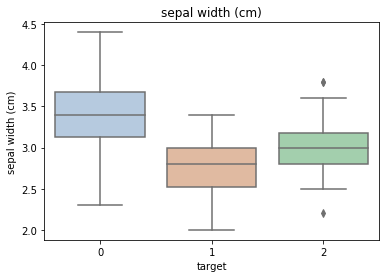

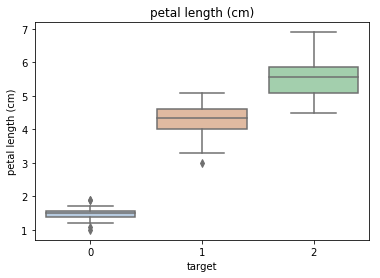

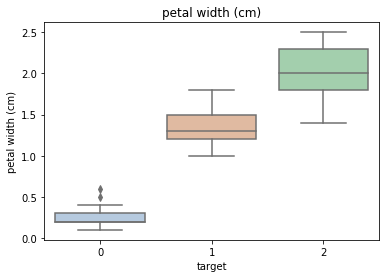

In [65]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5,palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

#### Step5: 利用 逻辑回归模型 在二分类上 进行训练和预测

In [20]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size = 0.2, random_state = 2020)

In [21]:
## 从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

sklearn.linear_model.LogisticRegression() 参数说明
solver参数决定了我们对逻辑回归损失函数的优化方法，有4种算法可以选择
lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
可参考 https://blog.csdn.net/sun_shengyun/article/details/53811483

In [22]:
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)
## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45244919 -0.81010583  2.14700385  0.90450733]]
the intercept(w0) of Logistic Regression: [-6.57504448]


In [23]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


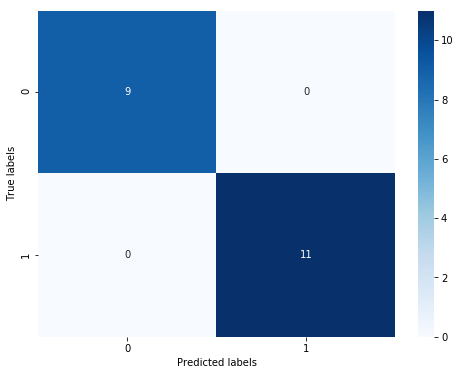

In [25]:
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Step6:  利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

In [26]:
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2)
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
## 查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)
## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)
## 由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。

the weight of Logistic Regression:
 [[-0.39145888  0.86668571 -2.20124306 -0.94484004]
 [-0.25833707 -2.40516115  0.67073903 -1.26310236]
 [-0.3379858  -0.17742551  2.66515585  2.29993628]]
the intercept(w0) of Logistic Regression:
 [  6.03099049   7.1602297  -14.42044786]


In [28]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n', test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）[预测正确的样本数目占总预测样本数目的比例] 评估模型效果
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[8.01645758e-04 6.38022318e-01 3.61176036e-01]
 [8.63297039e-06 3.76568001e-01 6.23423366e-01]
 [1.19348375e-03 5.37103287e-01 4.61703229e-01]
 [8.00752332e-01 1.99245054e-01 2.61435104e-06]
 [3.16558246e-03 5.16472137e-01 4.80362280e-01]
 [2.11292278e-03 4.78820071e-01 5.19067006e-01]
 [7.48710430e-01 2.51285130e-01 4.43982555e-06]
 [9.31003413e-01 6.89899740e-02 6.61321987e-06]
 [3.00690982e-03 8.07438178e-01 1.89554912e-01]
 [8.47884704e-01 1.52111144e-01 4.15157553e-06]
 [8.29305530e-01 1.70691315e-01 3.15502120e-06]
 [7.42373246e-01 2.57623592e-01 3.16280099e-06]
 [7.49049477e-01 2.50946443e-01 4.07941538e-06]
 [5.75086283e-02 9.34279507e-01 8.21186454e-03]
 [6.91279382e-01 3.08717150e-01 3.46830309e-06]
 [9.20028948e-01 7.99673311e-02 3.72074850e-06]
 [1.11313599e-02 8.72940368e-01 1.15928272e-01]
 [1.30886359e-03 4.85372622e-01 5.13318515e-01]
 [8.06481961e-01 1.93505340e-01 1.26989548e-05]
 [6.35872931e-03 5.85083073e-01 4.08558197e

The confusion matrix result:
 [[13  0  0]
 [ 0  7  3]
 [ 0  0  7]]


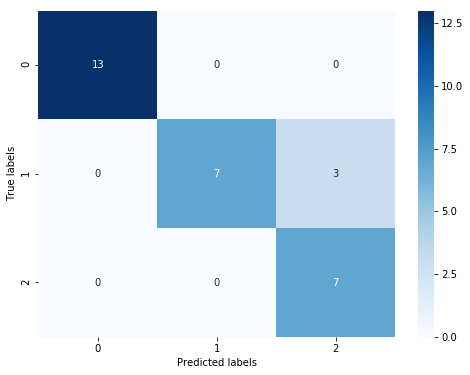

In [29]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

通过混淆矩阵可以看到，在预测结果中，10个类别为2的样本预测对了7个，有3个预测成了类别1 

## 三、学习问题与解答

##### 1、 The difference between Logistic Regression and linear regression?

res: 

(1) Linear regression predictions are continuous (numbers in a range).

(2) Logistic regression predictions are discrete (only specific values or categories are allowed).
We can also view probability scores underlying the model’s classifications.

##### 2. How to implement Multiclass logistic regression?

res:
    
Instead of y=0,1 we will expand our definition so that y=0,1...n. 
Basically we re-run binary classification multiple times, once for each class.

Procedure

        Divide the problem into n+1 binary classification problems (+1 because the index starts at 0?).
        For each class…
        Predict the probability the observations are in that single class.
        prediction = <math>max(probability of the classes)

For each sub-problem, we select one class (YES) and lump all the others into a second class (NO). Then we take the class with the highest predicted value.


## 四、学习思考与总结

参考：https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression 

代码已同步至：https://github.com/pyTouch/TianChiAIcampml

欢迎批评指正